<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/MLP_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. General Training Pipeline**

*   Design model
*   Construct loss
*   Construct optimizer
*   Training loop:
    * Forward pass : Compute Prediction
    * Backward pass : Compute Gradients
    * Weight update








# **2. Linear Regression**

Let us consider simple linear regression,

\begin{equation}
y = wx+b.
\end{equation}
The loss due to prediction can be computed as Mean Square Error (MSE) as given in the following equation.
\begin{equation}
loss, l = \frac{1}{N}\sum(y_i-\hat{y}_{i})^{2}
= \frac{1}{N}\sum(y_i-wx_i-b)^{2},
\end{equation}
\
where, $N$ is the number of observations, $\hat{y}_i$ is the prediction corresponding to $i^{th}$ sample.

Gradients of loss w.r.t $w$ and $b$ are given by,
\begin{equation}
\frac{\partial l}{\partial w} = -\frac{2}{N}\sum{x_i(y_i-\hat{y}_i)},
\end{equation}

\begin{equation}
\frac{\partial l}{\partial b} = -\frac{2}{N}\sum{(y_i-\hat{y}_i)}.
\end{equation}

Weights are updated as follows,
\begin{equation}
w_{new} = w - lr* \frac{\partial l}{\partial w}
\end{equation}
\begin{equation}
b_{new} = b- lr* \frac{\partial l}{\partial b}
\end{equation}


Let's consider,


\begin{equation}
y = 5x+3.
\end{equation}    


*  **Implemenation from scratch**

Initially, w =  -1.6525
At itertion  100 , w =  7.0656 , b =  1.6516 , loss =  0.5613  prediction =  72.3080
At itertion  200 , w =  6.2306 , b =  2.2386 , loss =  0.1989  prediction =  64.5445
At itertion  300 , w =  5.7361 , b =  2.5861 , loss =  0.0719  prediction =  59.9476
At itertion  400 , w =  5.4434 , b =  2.7919 , loss =  0.0274  prediction =  57.2256
At itertion  500 , w =  5.2700 , b =  2.9138 , loss =  0.0118  prediction =  55.6139
At itertion  600 , w =  5.1674 , b =  2.9859 , loss =  0.0063  prediction =  54.6596
At itertion  700 , w =  5.1066 , b =  3.0287 , loss =  0.0044  prediction =  54.0945
At itertion  800 , w =  5.0706 , b =  3.0540 , loss =  0.0037  prediction =  53.7599
At itertion  900 , w =  5.0493 , b =  3.0689 , loss =  0.0035  prediction =  53.5618
At itertion  1000 , w =  5.0367 , b =  3.0778 , loss =  0.0034  prediction =  53.4445


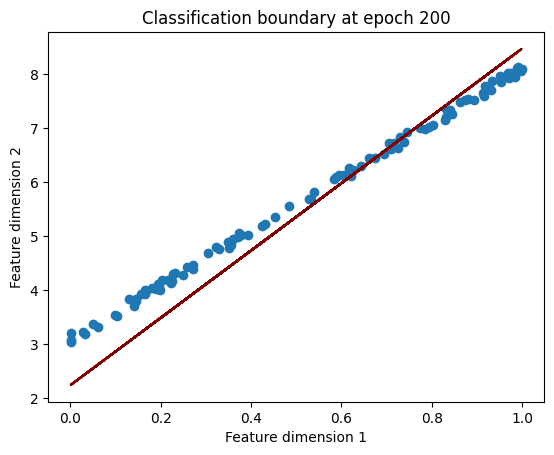

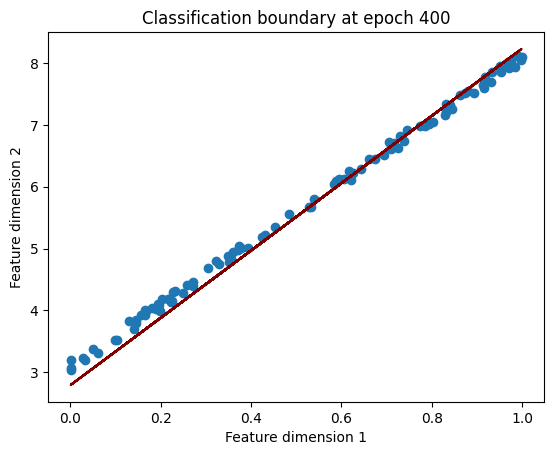

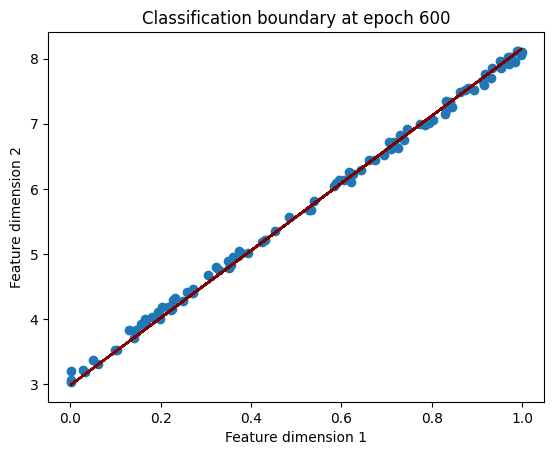

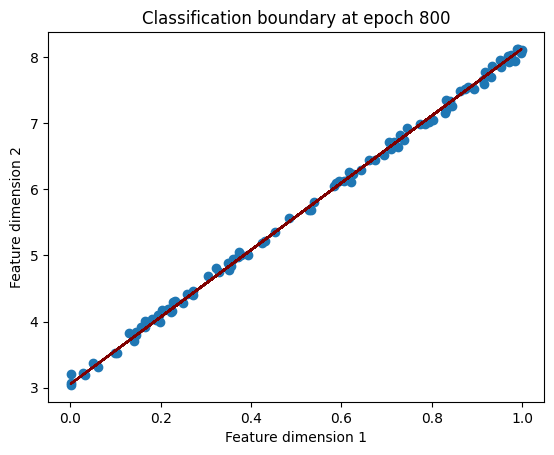

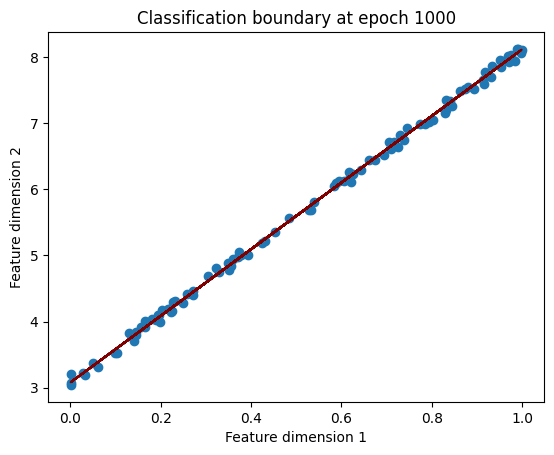

In [ ]:
# import libraries
import torch
import matplotlib.pyplot as plt

# generate data for y = 5x+3
x = torch.FloatTensor(100,).uniform_(0, 1)
y = 5*x+3
y = torch.add(y, torch.FloatTensor(100,).uniform_(0, .2))

#generate data using NumPy and move to torch
#import numpy as np
#x = np.array(np.random.uniform(0,1,100), dtype = np.float32)
#y = np.array(5*x+3, dtype = np.float32)
# add some noise
#x = np.add(x, np.random.uniform(0,.1,100))
#x = torch.tensor(x, dtype = torch.float32)
#y = torch.tensor(y, dtype = torch.float32)

# intilize weight
# w = torch.zeros([1,],dtype = torch.float32) #w = 0
# b = torch.zeros([1,],dtype = torch.float32) #b = 0

w = torch.randn(1) # randomly initialize w
b = torch.randn(1) # randomly initialize w

print("Initially, w = ", "{:.4f}".format(w[0]))

# define prediction
def prediction(x):
    return w*x + b

# define loss (MSE)
def loss(y,y_hat):
    return ((y-y_hat)**2).mean()

# define gradients
def gradients(x,y,y_hat):
    return -(torch.dot(2*x,(y-y_hat))).mean(), -(2*(y-y_hat)).mean()

# learning rate
lr = 0.01

# no of iterations
no_epochs = 1000

# iterative training
for epoch in range(no_epochs):
    y_p = prediction(x) # forwrd pass
    l = loss(y,y_p) # loss
    dw, db = gradients(x,y,y_p) # gradeints of loss wrt W
    w -= lr*dw # update weight
    b -= lr*db # update bias
    if (epoch+1)%100 == 0:
      print("At itertion ", epoch+1, ", w = ", "{:.4f}".format(w[0]),", b = ", "{:.4f}".format(b[0]),", loss = ", "{:.4f}".format(l), " prediction = ","{:.4f}".format(prediction(10)[0]))

    if (epoch+1)%200 == 0:
      plt.figure()
      plt.scatter(x,y)
      plt.plot(x,prediction(x), color ='#800000')
      plt.xlabel("Feature dimension 1")
      plt.ylabel("Feature dimension 2")
      plt.title("Classification boundary at epoch "+str(epoch+1))


*  **Implemenation using Torch.nn, autograd and torch.nn**

At itertion  400 , w =  4.4128 , b =  3.4346 , loss =  0.0358
At itertion  800 , w =  4.8066 , b =  3.2081 , loss =  0.0076


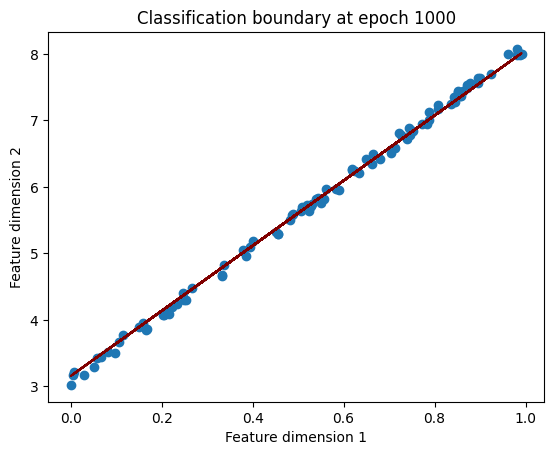

In [ ]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# generate data for y = 5x+3
X = torch.FloatTensor(100,1).uniform_(0, 1)
Y = X*5+3
Y = torch.add(Y, torch.FloatTensor(100,1).uniform_(0, .2))

X_test = torch.tensor([10], dtype = torch.float32)

in_dimension = X.shape[1]
out_dimension = Y.shape[1]

# define model
model = nn.Linear(in_features = in_dimension, out_features = out_dimension, bias= True)

# learning rate
lr = 0.02

# no of iterations
no_epochs = 1000

# define loss (MSE)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

# iterative training
for epoch in range(no_epochs):
    Y_p = model(X) # forwrd pass
    l = loss(Y,Y_p) # loss
    l.backward()

    optimizer.step() # update the step
    optimizer.zero_grad() # empty .grad

    [w,b]= model.parameters()
    if (epoch+1)%400 == 0:
      print("At itertion ", epoch+1, ", w = ", "{:.4f}".format(w.item()),", b = ", "{:.4f}".format(b.item()),", loss = ", "{:.4f}".format(l))


    if (epoch+1)%1000 == 0:
      plt.figure()
      plt.scatter(X,Y)
      plt.plot(X,model(X).detach().numpy(), color ='#800000')
      plt.xlabel("Feature dimension 1")
      plt.ylabel("Feature dimension 2")
      plt.title("Classification boundary at epoch "+str(epoch+1))

**torch.nn.Linear**


* Applies a linear transformation to the incoming data

\begin{equation}
y = xA^T+b
\end{equation}

* Parameters: in_features, out_features, bias

<br>

**Other linear layers:**
* torch.nn.Bilinear
* torch.nn.LazyLinear


<br>

#**Creating custom layers**

**Steps:**


1.  Subclassing from torch.nn.Module
2.  Define constructor
2.  Define forward pass



In [ ]:
import torch
import torch.nn as nn

class MyLinearLayer(nn.Module):
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_in,size_out)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.normal_(self.weights, mean = 0.0, std = 1.0) # weight init
        nn.init.normal(self.bias, mean = 0.0, std = 1.0)  # bias init

    def forward(self, x):
        w_times_x= torch.mm(x, self.weights)
        return torch.add(w_times_x, self.bias)  # w times x + b


In [ ]:
layer = MyLinearLayer(5,1)

# print weights and bias
print(layer.weights)
print(layer.bias)

Parameter containing:
tensor([[ 0.2182],
        [ 1.8235],
        [-1.7092],
        [-0.3110],
        [-1.1184]], requires_grad=True)
Parameter containing:
tensor([-0.2538], requires_grad=True)


/tmp/ipython-input-3157657520.py:15: FutureWarning: `nn.init.normal` is now deprecated in favor of `nn.init.normal_`.
  nn.init.normal(self.bias, mean = 0.0, std = 1.0)  # bias init


/tmp/ipython-input-3157657520.py:15: FutureWarning: `nn.init.normal` is now deprecated in favor of `nn.init.normal_`.
  nn.init.normal(self.bias, mean = 0.0, std = 1.0)  # bias init


At itertion  500 , w =  4.0382 , b =  3.6114 , loss =  0.0778
At itertion  1000 , w =  4.4835 , b =  3.3738 , loss =  0.0252
At itertion  1500 , w =  4.7258 , b =  3.2444 , loss =  0.0097
At itertion  2000 , w =  4.8577 , b =  3.1740 , loss =  0.0050
At itertion  2500 , w =  4.9294 , b =  3.1357 , loss =  0.0037
At itertion  3000 , w =  4.9685 , b =  3.1149 , loss =  0.0033
At itertion  3500 , w =  4.9897 , b =  3.1035 , loss =  0.0032
At itertion  4000 , w =  5.0013 , b =  3.0974 , loss =  0.0031
At itertion  4500 , w =  5.0076 , b =  3.0940 , loss =  0.0031
At itertion  5000 , w =  5.0110 , b =  3.0922 , loss =  0.0031


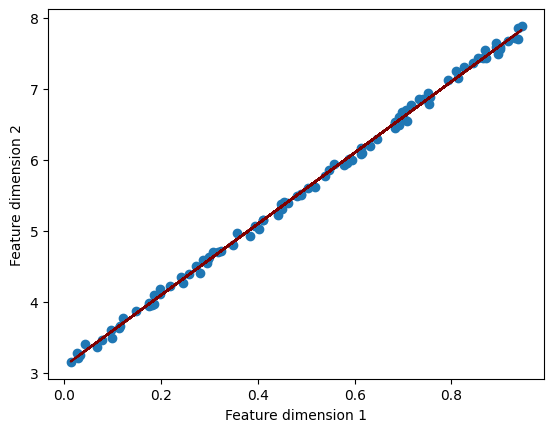

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# generate data for y = 5x+3
X = torch.FloatTensor(100,1).uniform_(0, 1)
Y = X*5+3
Y = torch.add(Y, torch.FloatTensor(100,1).uniform_(0, .2))

X_test = torch.tensor([10], dtype = torch.float32)

in_dimension = 1
out_dimension = 1

# define model
model = MyLinearLayer(1,1)

# learning rate
lr = 0.01

# no of iterations
no_epochs = 5000

# define loss (MSE)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

# iterative training
for epoch in range(no_epochs):
    Y_p = model(X) # forwrd pass
    l = loss(Y,Y_p) # loss
    l.backward()

    optimizer.step()
    optimizer.zero_grad()

    [w,b]= model.parameters()
    if (epoch+1)%500 == 0:
      print("At itertion ", epoch+1, ", w = ", "{:.4f}".format(w.item()),", b = ", "{:.4f}".format(b.item()),", loss = ", "{:.4f}".format(l))


    if (epoch+1)%5000 == 0:
      plt.figure()
      plt.scatter(X,Y)
      plt.plot(X,model(X).detach().numpy(), color ='#800000')
      plt.xlabel("Feature dimension 1")
      plt.ylabel("Feature dimension 2")

# **Perceptron**


# **Single layer perceptron for binary clssification**

epoch: 100, loss = 0.4087
epoch: 200, loss = 0.2374
epoch: 300, loss = 0.1679
epoch: 400, loss = 0.1301
epoch: 500, loss = 0.1095
epoch: 600, loss = 0.0974
epoch: 700, loss = 0.0897
epoch: 800, loss = 0.0844
epoch: 900, loss = 0.0805
epoch: 1000, loss = 0.0776


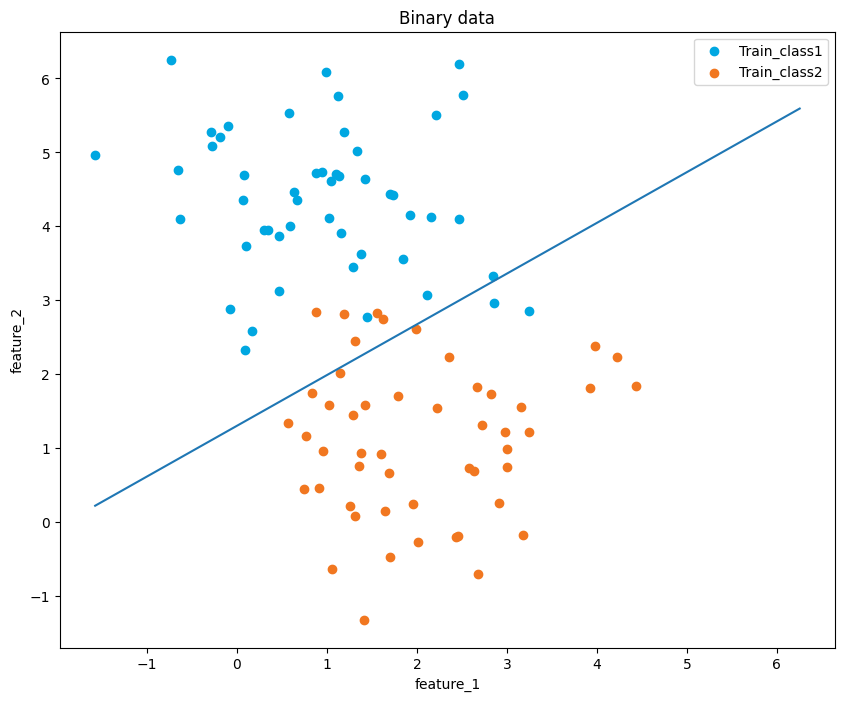

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import torch.nn.functional as F
# generate data for
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)
y = y.view(y.shape[0], 1)

in_dimension = 2
out_dimension = 1

# define model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(in_dimension)

# 2) Loss and optimizer
num_epochs = 1000
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100== 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


[w,b] = model.parameters()
x_min = X.min().view(1, 1)
y_min = ( (-(w[0][0] * x_min) - b[0]) / w[0][1])
x_max = X.max().view(1, 1)
y_max = ( (-(w[0][0] * x_max) - b[0]) / w[0][1] )

fig = plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0][y[:,0] == 0], X[:, 1][y[:,0]== 0], facecolors = '#00A7E1', edgecolor = '#00A7E1',marker = 'o', label = "Train_class1")
plt.scatter(X[:, 0][y[:,0] == 1], X[:, 1][y[:,0] == 1],facecolors='#F17720',edgecolor = '#F17720',marker = 'o',label = "Train_class2")
plt.plot(torch.cat((x_min, x_max)), torch.cat((y_min.detach(), y_max.detach())))
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Binary data')
plt.legend()

**Two approches to create network in pytorch**
*  Sequential
*  Module

<br>

**Using torch.nn.Sequential:**

In [ ]:
import torch
import torch.nn as nn

myNetwork = nn.Sequential(
  nn.Linear(5, 7),
  nn.Tanh(),
  nn.Linear(7, 2)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0.0)

myNetwork.apply(init_weights)

Sequential(
  (0): Linear(in_features=5, out_features=7, bias=True)
  (1): Tanh()
  (2): Linear(in_features=7, out_features=2, bias=True)
)

**Using torch.nn.Module:**

In [ ]:
import torch
import torch.nn as nn

class myNetwork(nn.Module):
  def __init__(self):
    super(myNetwork, self).__init__()
    self.hid = nn.Linear(5, 7)  # 5-7-2
    self.out = nn.Linear(7, 2)

    nn.init.xavier_uniform_(self.hid.weight)
    nn.init.zeros_(self.hid.bias)
    nn.init.xavier_uniform_(self.out.weight)
    nn.init.zeros_(self.out.bias)

  def forward(self, x):
    z = torch.tanh(self.hid(x))
    z = self.out(z)  # no softmax. see CrossEntropyLoss()
    return z

model = myNetwork()
model

myNetwork(
  (hid): Linear(in_features=5, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=2, bias=True)
)

# **Multilayer Perceptron**

epoch: 100, loss = 0.4609
epoch: 200, loss = 0.3020
epoch: 300, loss = 0.2143
epoch: 400, loss = 0.1671
epoch: 500, loss = 0.1391
epoch: 600, loss = 0.1203
epoch: 700, loss = 0.1068
epoch: 800, loss = 0.0965
epoch: 900, loss = 0.0882
epoch: 1000, loss = 0.0814
epoch: 1100, loss = 0.0758
epoch: 1200, loss = 0.0711
epoch: 1300, loss = 0.0671
epoch: 1400, loss = 0.0637
epoch: 1500, loss = 0.0608
epoch: 1600, loss = 0.0582
epoch: 1700, loss = 0.0560
epoch: 1800, loss = 0.0539
epoch: 1900, loss = 0.0521
epoch: 2000, loss = 0.0505
epoch: 2100, loss = 0.0490
epoch: 2200, loss = 0.0477
epoch: 2300, loss = 0.0465
epoch: 2400, loss = 0.0453
epoch: 2500, loss = 0.0443
accuracy: 95.6140


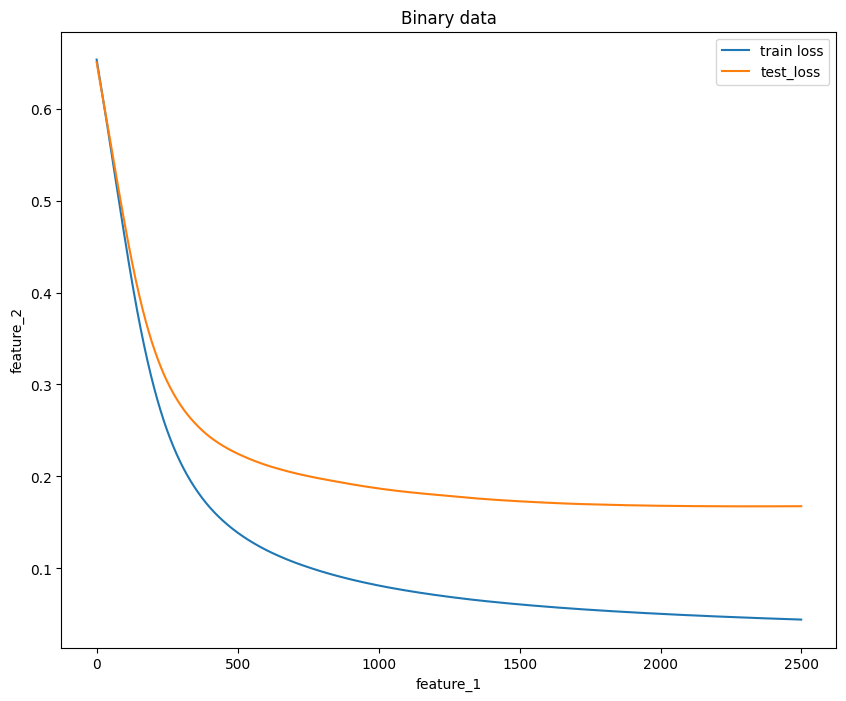

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
# class Model(nn.Module):
#     def __init__(self, n_input_features):
#         super(Model, self).__init__()
#         self.linear = nn.Linear(n_input_features, 1)

#     def forward(self, x):
#         y_pred = torch.sigmoid(self.linear(x))
#         return y_pred

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.sigmoid(out)
        # no activation and no softmax at the end
        return out


model = Model(n_features,10,1)

# 2) Loss and optimizer
num_epochs = 2500
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
train_loss = []
test_loss = []
ep = []
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    with torch.no_grad():
        y_test_pred = model(X_test)
        test_l = criterion(y_test_pred,y_test)
        # _, predicted = torch.max(y_pred.data, 1)
        ep.append(epoch)
        train_loss.append(loss.item())
        test_loss.append(test_l.item())

fig = plt.figure(figsize=(10, 8))
plt.plot(ep,train_loss)
plt.plot(ep,test_loss)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Binary data')
plt.legend(["train loss","test_loss"])

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = 100*y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

# **Loss Functions:**



*   Regression loss functions
*   Classification loss functions


1. Mean Absolute Error (L1 Loss Function) : **torch.nn.L1Loss**

\begin{equation}
MAEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}|y_i-\hat{y}_i|
\end{equation}





In [ ]:
import torch
y_pred = torch.tensor([0.000, 0.100, 0.200])
y_true = torch.tensor([0.000, 0.200, 0.250])

# Defining Mean Absolute Error loss function
def mae(pred, true):
    # Find absolute difference
    differences = pred - true
    absolute_differences = torch.absolute(differences)
    # find the absoute mean
    mean_absolute_error = absolute_differences.mean()
    return mean_absolute_error
mae_value = mae(y_pred, y_true)
print ("Custom MAE error is: ",mae_value.item())

mae_loss = torch.nn.L1Loss()
output = mae_loss(y_pred, y_true)
print ("torch.nn MAE error is: ",output.item())


Custom MAE error is:  0.05000000074505806
torch.nn MAE error is:  0.05000000074505806


2. Mean Square Error (L2 Loss Function):  **torch.nn.MSELoss**

\begin{equation}
MSEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(y_i-\hat{y}_i)^2
\end{equation}


In [ ]:
import torch
input = torch.randn(3, 4, requires_grad=True)
target = torch.randn(3, 4)

mse_loss = torch.nn.MSELoss()

output = mse_loss(input, target)

print('input -: ', input)
print('target -: ', target)
print('output -: ', output)

input -:  tensor([[ 0.0623, -1.3657,  0.4161,  0.2081],
        [ 0.0862,  0.5577,  1.0659,  1.1778],
        [ 0.0077,  0.3946, -0.9584,  0.7213]], requires_grad=True)
target -:  tensor([[-0.9499, -0.5298,  0.2174,  0.4559],
        [ 1.5050, -1.5035, -0.1809,  1.1256],
        [-0.4731,  0.1118, -0.4909, -0.9278]])
output -:  tensor(1.0744, grad_fn=<MseLossBackward0>)


3. Binary Cross Entropy:  **torch.nn.BCELoss**

\begin{equation}
BCEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(-y_i*\log{\hat{y}_i}-(1-y_i)*\log({1-\hat{y}_i}))
\end{equation}


In [ ]:
import torch

y_pred = torch.tensor([0.1580, 0.4137, 0.2285])
y_true = torch.tensor([0.0, 1.0, 0.0]) #2 labels: (0,1)

def BCE(y_pred, y_true):
    total_bce_loss = torch.sum(-y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred))
    # Getting the mean BCE loss
    num_of_samples = y_pred.shape[0]
    mean_bce_loss = total_bce_loss / num_of_samples

    return mean_bce_loss

bce_value = BCE(y_pred, y_true)
print ("Custom BCE error is: " , bce_value.item())

#using torch.nn.BCELoss
bce_loss = torch.nn.BCELoss()
output = bce_loss(y_pred, y_true)
print ("torch.nn BCE loss is: ",output.item())


Custom BCE error is:  0.43800267577171326
torch.nn BCE loss is:  0.43800270557403564



4. Cross-Entropy Loss Function:  **torch.nn.CrossEntropyLoss**


\begin{equation}
CEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(-y_i*\log{\hat{y}_i})
\end{equation}

In [ ]:
import torch

#Step 1: Import libraries & generate data
y_pred = torch.randn(3, 5, requires_grad=True)
y_true = torch.empty(3, dtype=torch.long).random_(5)

def log_softmax(x):
    return torch.log(torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True))

def CrossEntropyLoss(outputs, targets):
    num_examples = targets.shape[0]
    batch_size = outputs.shape[0]
    outputs = log_softmax(outputs)
    outputs = outputs[range(batch_size), targets]

    return - torch.sum(outputs)/num_examples

ce_value = CrossEntropyLoss(y_pred, y_true)
print ("Custom CE error is: " , ce_value.item())

#using torch.nn.CrossEntropyLoss
ce_loss = torch.nn.CrossEntropyLoss()
output = ce_loss(y_pred, y_true)
print ("torch.nn CE loss is: ",output.item())

Custom CE error is:  1.0291171073913574
torch.nn CE loss is:  1.0291171073913574


5. KL-divergence: **torch.nn.KLDivLoss**

\begin{equation}
KLDloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(y*\log{(y/\hat{y})})
\end{equation}

In [ ]:
import torch
y_pred = torch.randn(2, 3, requires_grad=True)
y_true = torch.randn(2, 3)

kld_loss = torch.nn.KLDivLoss(reduction = 'batchmean')
output = kld_loss(y_pred, y_true)

print('input tensor: ', y_pred)
print('target tensor: ', y_true)
print('Loss: ', output)



input tensor:  tensor([[ 1.9811, -1.9319, -0.0227],
        [ 1.7257, -1.4710,  1.1631]], requires_grad=True)
target tensor:  tensor([[-1.0374, -0.6472,  0.5497],
        [-1.0009, -0.1091,  1.0426]])
Loss:  tensor(nan, grad_fn=<DivBackward0>)


### (i) Multilinear Regression from scratch (NumPy, manual gradients)

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)

# True parameters
a_true, b_true, c_true = 2.0, -3.0, 5.0

# Target with noise
y = a_true * x1 + b_true * x2 + c_true + 0.1 * np.random.randn(N)


In [ ]:
#Initialize parameters
a, b, c = 0.0, 0.0, 0.0
lr = 0.01
epochs = 1000

In [ ]:
#Training loop (manual gradient descent)
for epoch in range(epochs):
    # Forward pass
    y_pred = a * x1 + b * x2 + c

    # Mean Squared Error
    loss = np.mean((y_pred - y) ** 2)

    # Gradients
    da = 2 * np.mean((y_pred - y) * x1)
    db = 2 * np.mean((y_pred - y) * x2)
    dc = 2 * np.mean(y_pred - y)

    # Update parameters
    a -= lr * da
    b -= lr * db
    c -= lr * dc

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}")


Epoch 0: Loss=35.2725
Epoch 200: Loss=0.0340
Epoch 400: Loss=0.0112
Epoch 600: Loss=0.0112
Epoch 800: Loss=0.0112


In [ ]:
print("Learned parameters:")
print(f"a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")

Learned parameters:
a = 2.023, b = -3.001, c = 5.009


## (ii) Multilinear Regression using PyTorch (nn + optim + autograd)

Epoch 0: Loss = 37.0676
Epoch 200: Loss = 0.0348
Epoch 400: Loss = 0.0067
Epoch 600: Loss = 0.0066
Epoch 800: Loss = 0.0066

Learned parameters:
a = 1.997, b = -2.992, c = 5.014


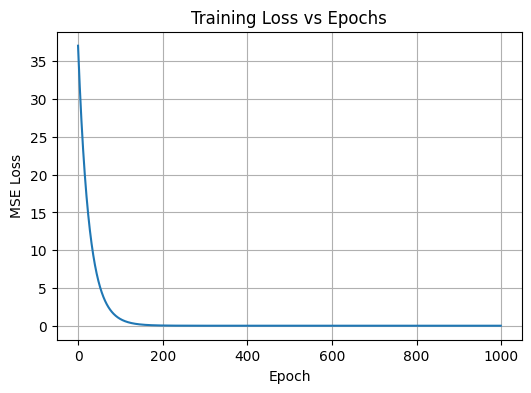

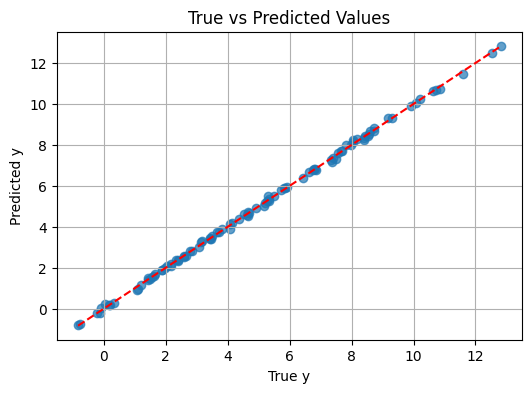

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt   # ✅ missing import

# 1. Generate synthetic data
torch.manual_seed(42)

N = 100
x1 = torch.randn(N, 1)
x2 = torch.randn(N, 1)

# True parameters
a_true, b_true, c_true = 2.0, -3.0, 5.0

# Target variable
y = a_true * x1 + b_true * x2 + c_true + 0.1 * torch.randn(N, 1)

# Combine features
X = torch.cat((x1, x2), dim=1)

# 2. Define model
model = torch.nn.Linear(2, 1)  # y = ax1 + bx2 + c

# 3. Loss & optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 4. Training loop
epochs = 1000
losses = []   # ✅ initialize losses list

for epoch in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # ✅ store loss

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 5. Learned parameters
a, b = model.weight.data[0]
c = model.bias.data[0]

print("\nLearned parameters:")
print(f"a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")

# 6. Plot: Training Loss vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()

# 7. Plot: True vs Predicted
with torch.no_grad():
    y_pred = model(X)

plt.figure(figsize=(6, 4))
plt.scatter(y.numpy(), y_pred.numpy(), alpha=0.7)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()
